<a href="https://colab.research.google.com/github/ali-unlu/K-Means-Cluster-Analysis/blob/main/K_Mean_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Credit Risk Data

# 1. Data

In this analysis, I will demostrate how PCA and K-Means clustering can be applied to credit risk data. In this data set, we do not have a target variable, which leads us to build an unsupervised machine learning model. 



The data could be downdloaded from [the Kaggle web page](https://www.kaggle.com/danildorofeev/credit-card-clustering/data)






__Aim of the analysis:__ In business practices, we need to identify our customers well enough tailor our services. Finance sector is one of the challing field since it distributes money to the customers and waits for its return. If give credits to those who fails to payback, the bank lose money. Thus, the aim of this analysis is to create proper clusters to lead experts grouping customers when giving credit or offer services. 

__Variable list__

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

### Data load

__Google Colab__: Since I am using Google colab, I will use codes below to connect platform to my personal Drive, where the data is. 

In [1]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')
# set the folder
import sys
sys.path.append('/content/drive/MyDrive/Python/IBM Machine Learning/Unsupervised/assignment')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Python/IBM Machine Learning/Unsupervised/assignment/CC_GENERAL.csv')

Dimension of the data

In [4]:
data.shape

(8950, 18)


As seen from above, there are 18 variables and more 8950 rows.

In [5]:
data.head().T

,0,1,2,3,4
CUST_ID,C10001,C10002,C10003,C10004,C10005
BALANCE,40.9007,3202.47,2495.15,1666.67,817.714
BALANCE_FREQUENCY,0.818182,0.909091,1,0.636364,1
PURCHASES,95.4,0,773.17,1499,16
ONEOFF_PURCHASES,0,0,773.17,1499,16
INSTALLMENTS_PURCHASES,95.4,0,0,0,0
CASH_ADVANCE,0,6442.95,0,205.788,0
PURCHASES_FREQUENCY,0.166667,0,1,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0,0,1,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0,0,0,0


In [6]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
original_data = data.copy()

# 2. Data processing

### 2.1. Outliers

First, let's get rid of the noise. we're going to first set all outliers as NaN, so it will be taken care of in the next stage, where we impute the missing values.

In [8]:
# helper function for outliers
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [9]:
df = data.drop(['CUST_ID'], axis=1)
for column in df.columns:
    data = df[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 7.77%
Outliers in "BALANCE_FREQUENCY": 16.68%
Outliers in "PURCHASES": 9.03%
Outliers in "ONEOFF_PURCHASES": 11.32%
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Outliers in "CASH_ADVANCE": 11.51%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 8.56%
Outliers in "CREDIT_LIMIT": 2.77%
Outliers in "PAYMENTS": 9.03%
Outliers in "MINIMUM_PAYMENTS": 9.74%
Outliers in "PRC_FULL_PAYMENT": 16.47%
Outliers in "TENURE": 15.26%


In [10]:
for column in df.columns:
    data = df[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    df[column].loc[outliers] = np.nan
    
df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

### 2.2. Missing variables

In [11]:
# imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 2.3. Skewness

Normal distrubution is always improve our results, for that reason we can transfor the data with log. To do so, we can first identify the skewed variables and we can take their logs. 

In [12]:
skew_columns = (df
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75] 
skew_columns

PRC_FULL_PAYMENT              2.674283
ONEOFF_PURCHASES              1.634574
CASH_ADVANCE                  1.515244
CASH_ADVANCE_TRX              1.484408
INSTALLMENTS_PURCHASES        1.269974
CASH_ADVANCE_FREQUENCY        1.203455
ONEOFF_PURCHASES_FREQUENCY    1.185637
PURCHASES                     1.106747
BALANCE                       1.026081
MINIMUM_PAYMENTS              1.014393
PAYMENTS                      0.919564
PURCHASES_TRX                 0.917829
CREDIT_LIMIT                  0.903319
dtype: float64

In [13]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

### 2.4. Scaling

Since clustering is mainly all about the measurement of the distances, the variables should be in the same scale. To do so, I used standar scaler. You can also scaling methods such as minumum maksimum scaling. 

In [14]:
# Scaling
from sklearn.preprocessing import StandardScaler


df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,1.804329e-16,3.641780e-15,8.128197e-16,7.264927e-15,7.496921e-16,-6.901990e-17,-3.716084e-16,-2.944981e-15,2.353921e-16,-8.168761e-16,3.611512e-16,2.066379e-16,1.079459e-14,3.469602e-16,1.528510e-16,3.922827e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-3.149535e+00,-4.155613e+00,-1.712969e+00,-9.966080e-01,-1.103642e+00,-9.167126e-01,-1.221758e+00,-7.829795e-01,-9.169952e-01,-7.732021e-01,-8.240041e-01,-1.450627e+00,-5.234681e+00,-4.436711e+00,-5.832552e+00,-4.618587e-01,0.0
25%,-6.353597e-01,3.667368e-01,-3.856694e-01,-9.966080e-01,-1.103642e+00,-9.167126e-01,-1.014125e+00,-7.829795e-01,-9.169952e-01,-7.732021e-01,-8.240041e-01,-8.964305e-01,-8.824543e-01,-3.899982e-01,-6.951056e-01,-4.618587e-01,0.0
50%,3.509276e-01,3.667368e-01,3.980990e-01,1.512177e-01,4.484657e-01,-9.167126e-01,2.404259e-02,-3.338645e-01,-4.976286e-01,-7.732021e-01,-8.240041e-01,2.119634e-01,-8.903125e-02,1.549536e-01,-3.297194e-02,-4.618587e-01,0.0
75%,7.697879e-01,3.667368e-01,7.725297e-01,1.008550e+00,9.426891e-01,1.125808e+00,1.062211e+00,5.634758e-01,9.701506e-01,5.147273e-01,9.069713e-01,8.603322e-01,8.476481e-01,6.857258e-01,8.611289e-01,-1.982171e-01,0.0
max,1.249254e+00,3.667368e-01,1.121123e+00,1.483773e+00,1.333626e+00,1.492607e+00,1.269843e+00,2.357005e+00,1.599199e+00,2.863877e+00,2.170092e+00,1.537778e+00,1.819271e+00,1.232603e+00,1.664796e+00,4.126671e+00,0.0


We can also make all numeric values in float format

In [15]:
# Convert to floats
for col in df.columns:
    df[col] = df[col].astype(np.float)

### 2.5. Correlation table
Finally, I would like to see whether there is a high correlation between our features. The result shows only one correlation score is above the 0.90 level and the rest are pretty good to proceed the analysis.

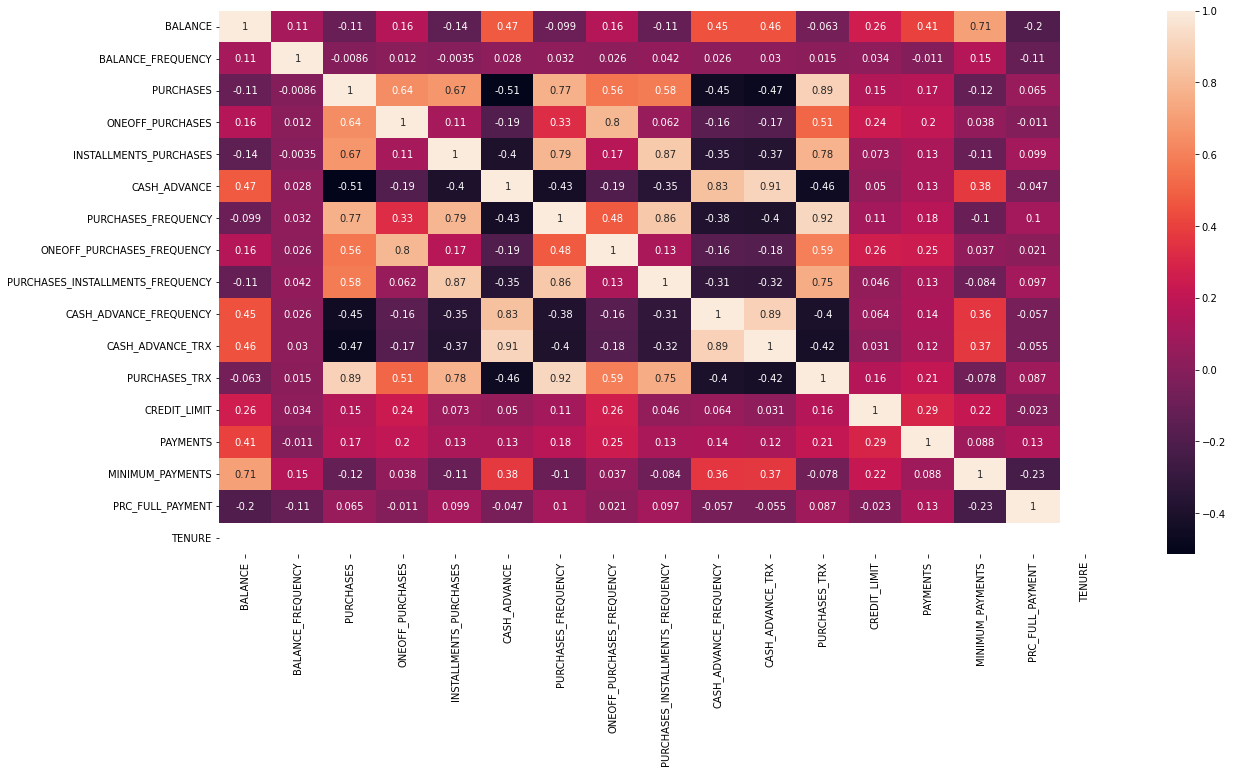

In [16]:
# The correlation matrix
corr_mat = df.corr()
    
f,ax=plt.subplots(figsize=(20,10))

sns.heatmap(corr_mat,annot=True)


In [17]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

BALANCE                                                      BALANCE
BALANCE_FREQUENCY                                  BALANCE_FREQUENCY
PURCHASES                                                  PURCHASES
ONEOFF_PURCHASES                                    ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES                        INSTALLMENTS_PURCHASES
CASH_ADVANCE                                            CASH_ADVANCE
PURCHASES_FREQUENCY                              PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY    PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY                        CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX                                    CASH_ADVANCE_TRX
PURCHASES_TRX                                          PURCHASES_TRX
CREDIT_LIMIT                                            CREDIT_LIMIT
PAYMENTS                                                    PAYMENTS
MINIMUM_PAYMENTS                  

# 3. PCA Analysis

K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. So, before using these methods, we have to reduce the number of dimensions. I'm going to use PCA, which is by far the most popular dimensionality reduction algorithm.

But first, let's see to what extend the size PCA components contribute to the variance. 

In [18]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 15):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.357977
2,PCA(n_components=2),0.544025
3,PCA(n_components=3),0.646517
4,PCA(n_components=4),0.727239
5,PCA(n_components=5),0.787783
6,PCA(n_components=6),0.844359
7,PCA(n_components=7),0.888486
8,PCA(n_components=8),0.930241
9,PCA(n_components=9),0.948918


here I set parameter n_components equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.



---



In [19]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(df)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(df), columns=PC_names)

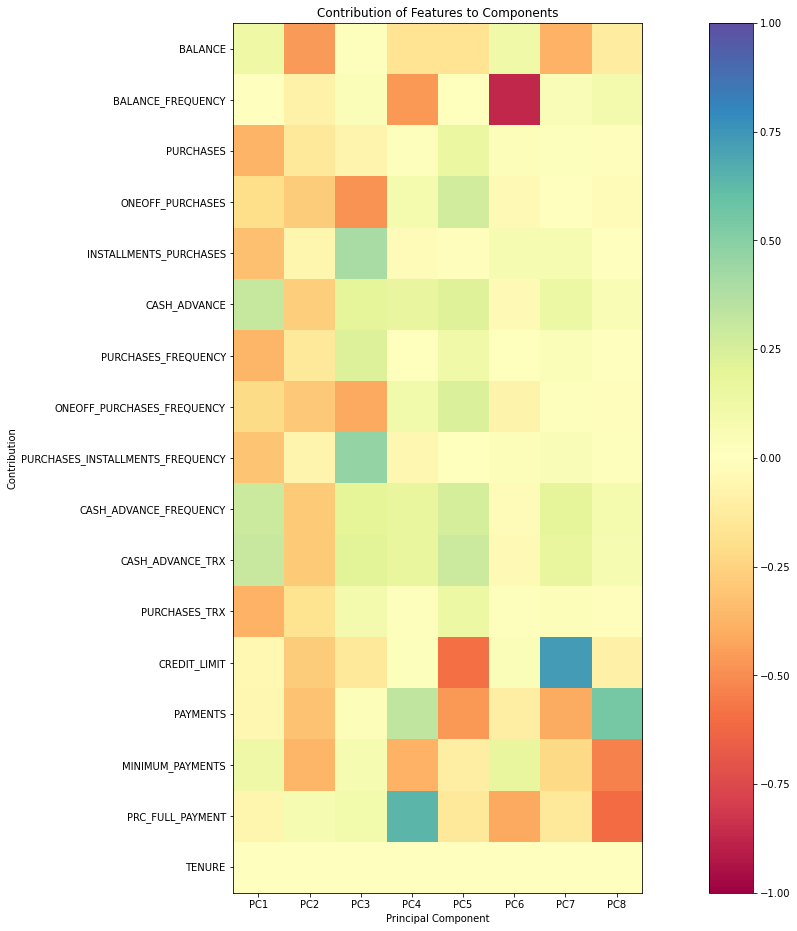

In [20]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# 4. K-Means
After we reduced the dimension of the data, we can apply K-Means clustering technique. We can first visually control how inertia reduces by the number of clusters. 

In [21]:
from sklearn.cluster import KMeans

km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(pca_data)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

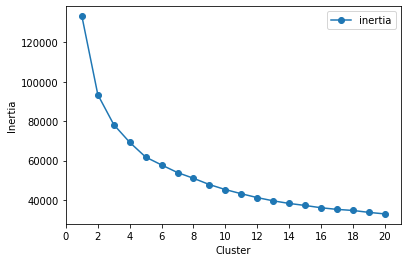

In [22]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

### 4.1. Find the n_clusters parameter using the elbow method
As seen above, we can determine the the cluster size by visual checking but the KElbow visualizer is also a good tools to select the best parameter. *italicized text*


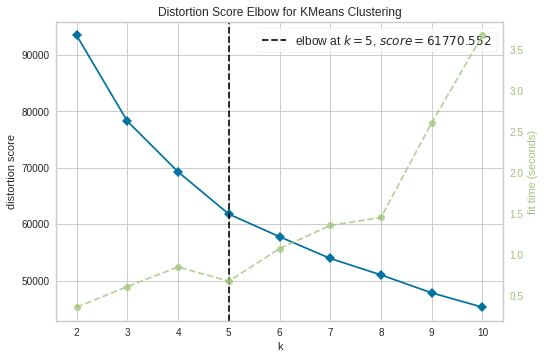

In [23]:
# elbow method
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,11))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show() 

As seen above, 5 k works well to cluster this data set. 



In [24]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)

Now I add these labels to 3 dataframes:

__original data:__ original dataframe  
__df:__ imputed, standardized dataframe  
__pca_data:__ Transformed data after PCA  

In [25]:
original_data['LABELS'] = labels
df['LABELS'] = labels
pca_data['LABELS'] = labels

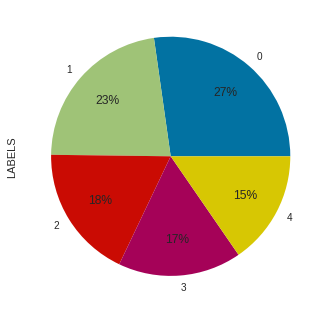

In [26]:
# Let's see how our data is distributed among these 5 clusters:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)



# 5. Evaluate the Model

Let's see how good/bad is our model.

**we start by caculating two metrics**:


---
**bold text**


__The Davis-Bouldin Index__ is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.

__The Silhouette Coefficient__ is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.



In [27]:
# cluster metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.2454186515741676
Silhouette Score = 0.3180854771969296


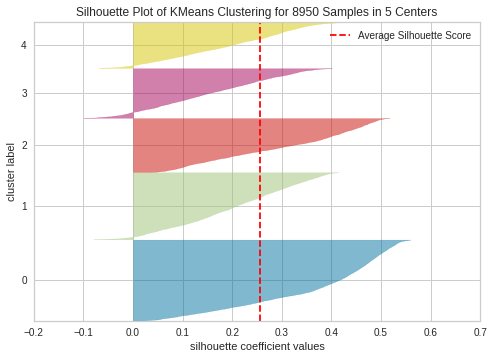

In [28]:
# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer


visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))
visualizer.show()


Here, the vertical dotted red line in this plot is the average score. It looks like our clustering method is good, since each cluster bumps out above the average, and the cluster scores look decent.



# 6. Interpret the results
alright, we have nice clusters, but what do they mean? let's figure out.

In [29]:
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

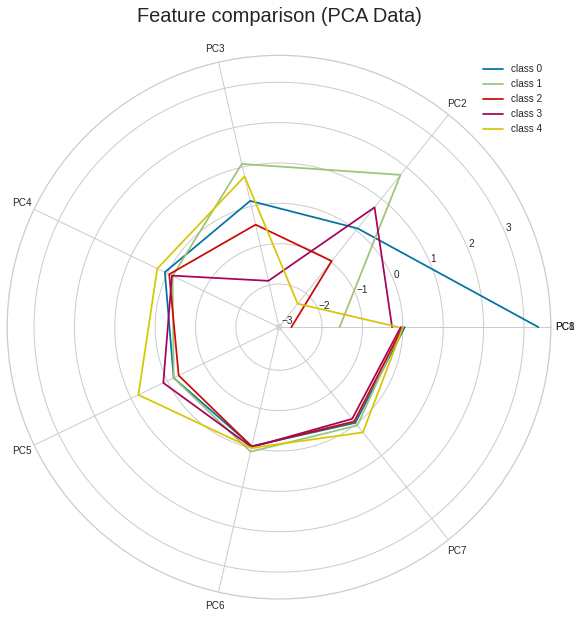

In [30]:
spider_plot(pca_data, 'PCA Data')


It looks like PC1, PC2 and PC3 were the most important Principal Components. Let's get the same plot, this time for original features:

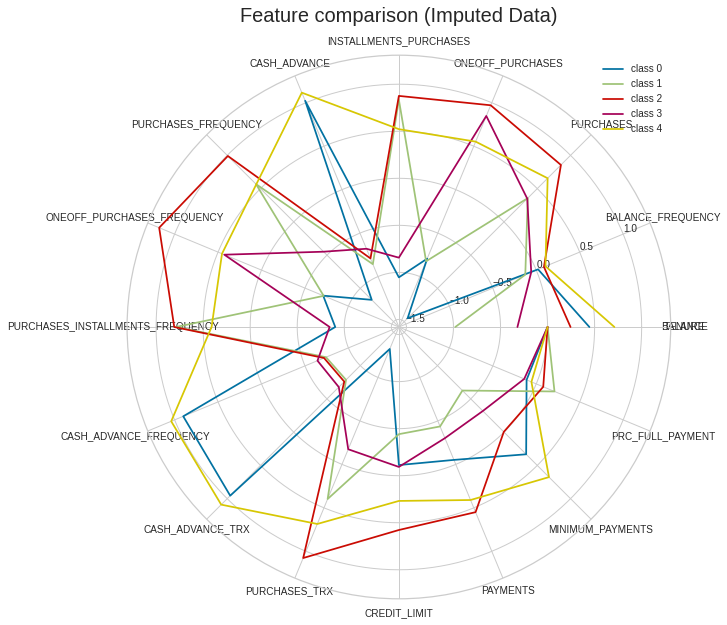

In [31]:
spider_plot(df, 'Imputed Data')


# 7. Summary

- The results show that there are five different customer clusters, with the distinct spending behevior.
- Class 0, blue line, represent a customer group who has a balance but do not use credit card on purchase, instad this group use credit car more likely on cash advance, cash advance frequency, cash advance trx. They most likely use their credit card on cash transaction. 
- Class 1, green line, represent groups that have less balance but spending more on purchases, installment purchases, purchases frequency, purchase installments frequency. For instance, this group is the risky one for the bank. 
- Class 2, red line, is the group who has the balance and higher purchase score compare to all other groups withour cash transactions. 
- Class 3, bordeux line, more controlled group on their credit card usage. Although they have sufficient balance, they use their credit card only in purchased but less than class 2. 
- Class 4, yellow line, they have similar spending behavior with class 2 but this group also use cash transactions a lot. This group has also higher credit card activity compared to all groups.
- This is a general interpretation who has not have a financial expertise, probably a field expert can interpret these results better. 





I highly benefited from the MOHAMMAD NAMVARPOUR post [here](https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset/notebook). He found four clusters with the same data but mine was 5. The main differences between methods I applied log transformation on skewed variables. I also included some visual representations how number of clusters change the inertia scores.